# Fashion MNIST Keras Demo for ANN and CNN
In this notebook, you will be working with a variation of the standard MNIST dataset, the Fashion MNIST :P
The standard MNIST dataset is the digit recognition, which has a bunch of images of handwritten digits (0-9), and the goal is to train a classification model that will accurately recognize the digit given the image

A popular demonstration of the capability of deep learning techniques is object recognition in image data.

The “hello world” of object recognition for machine learning and deep learning is the MNIST dataset for handwritten digit recognition.

In this post you will discover how to develop a deep learning model to achieve near state of the art performance on the MNIST handwritten digit recognition task in Python using the Keras deep learning library.

After completing this tutorial, you will know:

- How to load the MNIST dataset in Keras.
- How to develop and evaluate a baseline neural network model for the MNIST problem.
- How to implement and evaluate a simple Convolutional Neural Network for MNIST.
- How to implement a close to state-of-the-art deep learning model for MNIST.

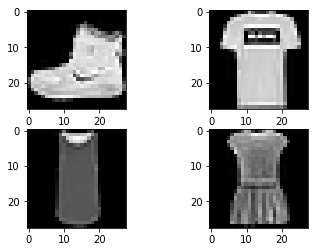

In [78]:
# Plot ad hoc mnist instances
from keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
%matplotlib inline
# load (downloaded if needed) the MNIST dataset
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
# plot 4 images as gray scale
plt.subplot(221)
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[3], cmap=plt.get_cmap('gray'))
# show the plot
plt.show()

In [79]:
import numpy
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils

## Let's examine the shape of X and y

In [80]:
X_train.shape

(60000, 28, 28)

In [81]:
y_train.shape

(60000,)

### A simple ANN can only take a linear array of features as input. Our image is a 28 * 28, so we reshape it to a single 1D array of 784 features using the ```numpy's reshape( )``` function

In [82]:
# flatten 28*28 images to a 784 vector for each image
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')

In [83]:
print("Reshaped X_train shape: " + str(X_train.shape))
print("Reshaped X_test shape: " + str(X_test.shape))
print("y_train shape: " + str(y_train.shape))
print("y_test shape: " + str(y_test.shape))

Reshaped X_train shape: (60000, 784)
Reshaped X_test shape: (10000, 784)
y_train shape: (60000,)
y_test shape: (10000,)


## In ML tasks, a common preprocessing step is to normalize the data. This involves scaling the data down, recentering, etc.

In [84]:
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255

## Before we can train the model, we need to convert the output labels into a one-hot encoded form. This is done in the following lines using the ```to_categorical( )``` function

In [85]:
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [86]:
print("Shape of y_train after one hot encoding " + str(y_train.shape))
print("Shape of y_test after one hot encoding " + str(y_test.shape))

Shape of y_train after one hot encoding (60000, 10)
Shape of y_test after one hot encoding (10000, 10)


## Baseline ANN model

In [87]:
# define baseline model
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal', activation='relu'))
    model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [90]:
# build the model
ann_model = baseline_model()
# Fit the model
ann_history = ann_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)
# Final evaluation of the model
scores = ann_model.evaluate(X_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 10s - loss: 0.5149 - acc: 0.8200 - val_loss: 0.4308 - val_acc: 0.8481
Epoch 2/10
 - 10s - loss: 0.3750 - acc: 0.8660 - val_loss: 0.3827 - val_acc: 0.8647
Epoch 3/10
 - 12s - loss: 0.3325 - acc: 0.8800 - val_loss: 0.3796 - val_acc: 0.8616
Epoch 4/10
 - 12s - loss: 0.3057 - acc: 0.8893 - val_loss: 0.3478 - val_acc: 0.8741
Epoch 5/10
 - 10s - loss: 0.2891 - acc: 0.8933 - val_loss: 0.3514 - val_acc: 0.8740
Epoch 6/10
 - 11s - loss: 0.2758 - acc: 0.8982 - val_loss: 0.3589 - val_acc: 0.8714
Epoch 7/10
 - 10s - loss: 0.2573 - acc: 0.9046 - val_loss: 0.3312 - val_acc: 0.8796
Epoch 8/10
 - 10s - loss: 0.2461 - acc: 0.9097 - val_loss: 0.3211 - val_acc: 0.8870
Epoch 9/10
 - 10s - loss: 0.2350 - acc: 0.9133 - val_loss: 0.3170 - val_acc: 0.8893
Epoch 10/10
 - 10s - loss: 0.2252 - acc: 0.9164 - val_loss: 0.3226 - val_acc: 0.8846
Baseline Error: 11.54%


# Simple CNN model for the Fashion-MNIST dataset

In [91]:
# load (downloaded if needed) the MNIST dataset
# Note that earlier we reshaped the dataset of 28 x 28 images into a single linear array of 784 values
# A CNN takes the raw images themselves as input, so we can feed a numpy array like (num_images, 28, 28) as input
# Let's refresh what the shape of X_train and X_test were
print("X_train shape: " + str(X_train.shape))
print("X_test shape: " + str(X_test.shape))

X_train shape: (60000, 784)
X_test shape: (10000, 784)


In [92]:
X_train = X_train.reshape(X_train.shape[0],28,28,1)
X_test = X_test.reshape(X_test.shape[0],28,28,1)

In [93]:
print("Reshaped X_train shape for CNN training: " + str(X_train.shape))
print("Reshaped X_test shape for CNN training: " + str(X_test.shape))

Reshaped X_train shape for CNN training: (60000, 28, 28, 1)
Reshaped X_test shape for CNN training: (10000, 28, 28, 1)


In [94]:
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D

In [95]:
def baseline_cnn_model():
    # create model
    model = Sequential()
    model.add(Conv2D(32, (5, 5), input_shape=(28, 28,1), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [96]:
# build the model
cnn_model = baseline_cnn_model()
# Fit the model
cnn_history = cnn_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)
# Final evaluation of the model
scores = cnn_model.evaluate(X_test, y_test, verbose=0)
print("CNN Error: %.2f%%" % (100-scores[1]*100))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 54s - loss: 0.5168 - acc: 0.8190 - val_loss: 0.4038 - val_acc: 0.8576
Epoch 2/10
 - 55s - loss: 0.3506 - acc: 0.8755 - val_loss: 0.3384 - val_acc: 0.8798
Epoch 3/10
 - 59s - loss: 0.3116 - acc: 0.8891 - val_loss: 0.3217 - val_acc: 0.8831
Epoch 4/10
 - 52s - loss: 0.2804 - acc: 0.8989 - val_loss: 0.3019 - val_acc: 0.8904
Epoch 5/10
 - 53s - loss: 0.2622 - acc: 0.9047 - val_loss: 0.2902 - val_acc: 0.8932
Epoch 6/10
 - 52s - loss: 0.2429 - acc: 0.9117 - val_loss: 0.2789 - val_acc: 0.8984
Epoch 7/10
 - 54s - loss: 0.2274 - acc: 0.9164 - val_loss: 0.2642 - val_acc: 0.9047
Epoch 8/10
 - 52s - loss: 0.2146 - acc: 0.9220 - val_loss: 0.2894 - val_acc: 0.8960
Epoch 9/10
 - 64s - loss: 0.2001 - acc: 0.9255 - val_loss: 0.2504 - val_acc: 0.9098
Epoch 10/10
 - 57s - loss: 0.1917 - acc: 0.9291 - val_loss: 0.2496 - val_acc: 0.9077
CNN Error: 9.23%


In [97]:
fashion_mnist_classes = numpy.array(["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"])

# We plot the train & val accuracy against the number of epochs
Keras conveniently stores these in an object of type History, which is returned whenever the ```fit``` function is called on a model

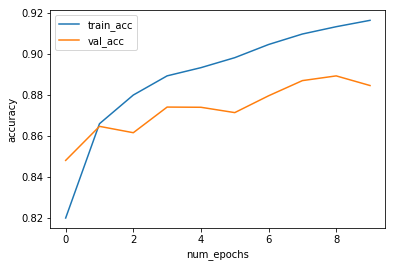

In [98]:
plt.plot(ann_history.history['acc'])
plt.plot(ann_history.history['val_acc'])
plt.xlabel("num_epochs")
plt.ylabel("accuracy")
plt.legend(["train_acc","val_acc"])

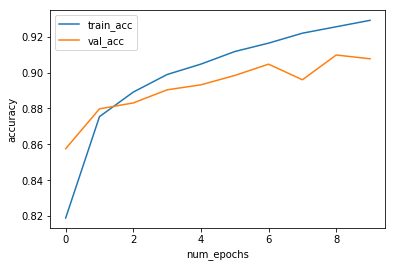

In [99]:
plt.plot(cnn_history.history['acc'])
plt.plot(cnn_history.history['val_acc'])
plt.xlabel("num_epochs")
plt.ylabel("accuracy")
plt.legend(["train_acc","val_acc"])

### Note that what matters always is the validation accuracy. The validation accuracy tells us how the model performs on unseen data, i.e: data that has not been used during training. The CNN model has a decently better validation accuracy, as expected

## Predictions: Let's look at some actual instances in the test set and see what the model predicts

In [101]:
def get_predictions(model,X):
    predictions = model.predict(X)
    class_indices = numpy.argmax(predictions,axis=1)
    return fashion_mnist_classes[class_indices]

In [102]:
predicted_labels_ann = get_predictions(ann_model,X_test.reshape(X_test.shape[0],28*28))

In [104]:
predicted_labels_cnn = get_predictions(cnn_model,X_test.reshape(X_test.shape[0],28,28,1))

In [109]:
def examine_prediction(index):
    plt.imshow(X_test[index].reshape(28,28),cmap=plt.get_cmap('gray'))
    print("Predicted class from ANN: " + predicted_labels_ann[index])
    print("Predicted class from CNN: " + predicted_labels_cnn[index])

Predicted class from ANN: Ankle boot
Predicted class from CNN: Ankle boot


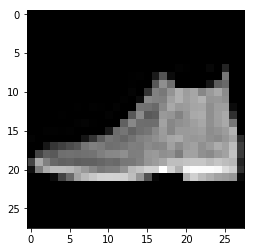

In [112]:
examine_prediction(0)

Predicted class from ANN: Ankle boot
Predicted class from CNN: Ankle boot


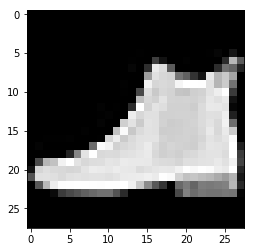

In [113]:
examine_prediction(123)

Predicted class from ANN: Bag
Predicted class from CNN: Bag


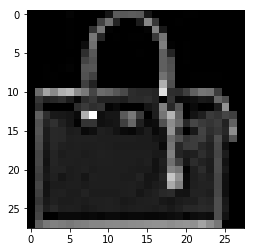

In [114]:
examine_prediction(1521)

Predicted class from ANN: Trouser
Predicted class from CNN: Trouser


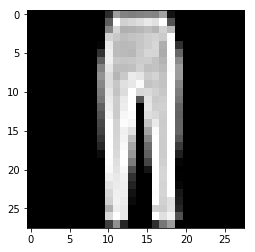

In [115]:
examine_prediction(140)

Predicted class from ANN: Dress
Predicted class from CNN: Dress


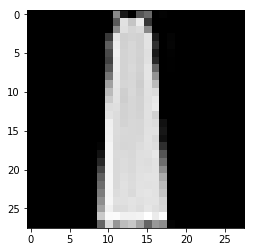

In [116]:
examine_prediction(1102)

# Exercise Task
Find the indices of the test set, which are misclassified by the CNN model...
There are obviously certain images for which the CNN model does not predict the correct class label. Your task is to find these indices.
To demonstrate your output, print the image, the original class label, and the predicted class label, and show that ```original``` $!=$ ```predicted```

In [119]:
original_labels = fashion_mnist_classes[numpy.load('y_test.npy')]

In [120]:
misclassified_indices = []
for i in range(len(original_labels)):
    if original_labels[i] != predicted_labels_cnn[i]:
        misclassified_indices.append(i)

Original label: Sneaker
CNN label: Bag


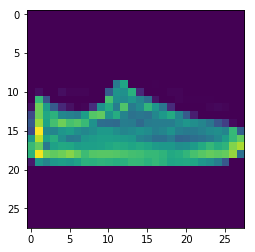

In [122]:
plt.imshow(X_test[misclassified_indices[0]].reshape(28,28))
print("Original label: %s" % original_labels[misclassified_indices[0]])
print("CNN label: %s" % predicted_labels_cnn[misclassified_indices[0]])

Original label: Dress
CNN label: Shirt


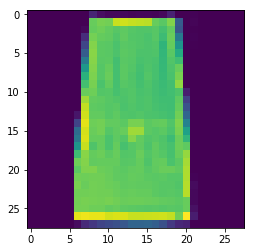

In [123]:
plt.imshow(X_test[misclassified_indices[5]].reshape(28,28))
print("Original label: %s" % original_labels[misclassified_indices[5]])
print("CNN label: %s" % predicted_labels_cnn[misclassified_indices[5]])

In [124]:
len(misclassified_indices)

923

### This means that 923 of the images in the test set were labelled wrong by our CNN model. The test set, remember, had a total of 10000 images

In [146]:
ratio_misclassified = len(misclassified_indices)/len(original_labels)
print("Ratio of test images misclassified: %.3f%%" % (ratio_misclassified*100))
print("Ratio of test images correctly classified: %.3f%%" % ((1 - ratio_misclassified)*100))

Ratio of test images misclassified: 9.230%
Ratio of test images correctly classified: 90.770%


# Note that in doing this task you just verified that the accuracy of the model on the test set, is in fact 90.77% !
Scroll up to the the line where you trained the CNN model and check the validation accuracy reported on the final epoch!